In [275]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = pd.read_csv('Algerian_forest_fires_cleaned.csv')

In [276]:
## Viewing the first 5 rows of the dataset
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [277]:
## Shape of the dataset
df.shape

(243, 15)

In [278]:
## Statistics of the dataset
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [279]:
## Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [280]:
## Check for null values
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [281]:
df.duplicated().sum()

0

## Exploratory Data Analysis and Feature Engineering
- Label Encoding for "Classes" column. We're using map() method of DF for more control
- Visualization of datasets

In [282]:
## Checking for varieties of "Classes"
df["Classes"].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [283]:
## Removing spaces from "Classes" column
df["Classes"] = df["Classes"].str.strip()

In [284]:
df["Classes"].unique()

array(['not fire', 'fire'], dtype=object)

In [285]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


### Label Encoding for "Classes" column. We're using map() method of DF for more control

In [286]:
## Label Encoding for "Classes" column. We're using map() method of DF for more control over the encoding
classes_mapping = {"not fire": 0, "fire": 1}

## Applying the mapping using map() method
df["Classes"] = df["Classes"].map(classes_mapping)

In [287]:
## Count the number per class
df["Classes"].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [288]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [289]:
## Dropping the day, month and year columns... we don't need them anymore
df_cleaned = df.drop(["day", "month", "year"], axis=1)

In [290]:
df_cleaned.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [291]:
df_cleaned.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


C:\Users\Jojo\AppData\Local\Temp\ipykernel_2404\4248873207.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


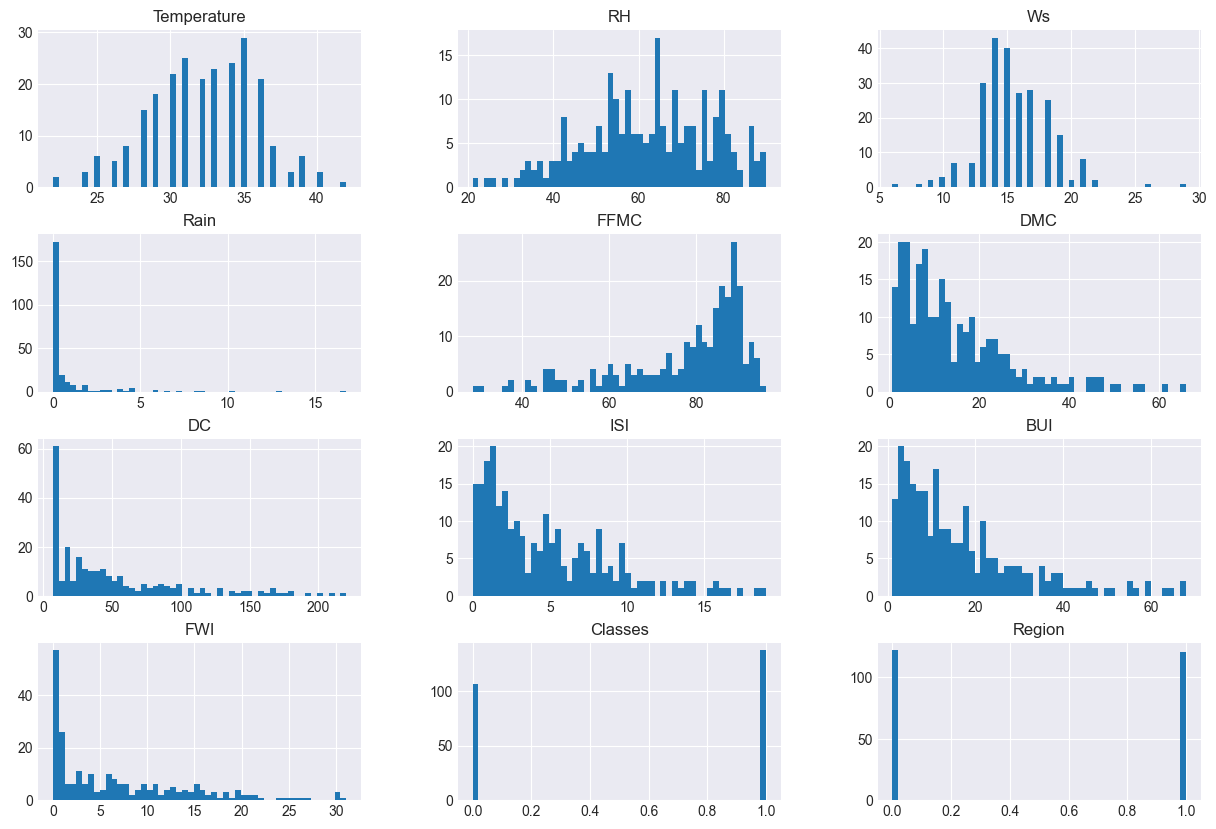

In [292]:
## Density plot for each column/feature
plt.style.use("seaborn-darkgrid")
df_cleaned.hist(bins=50, figsize=(15,10))
plt.show()

In [293]:
## Computing the percentage of each class
percentage=df_cleaned["Classes"].value_counts(normalize=True)*100

<Axes: ylabel='Distribution of Classes'>

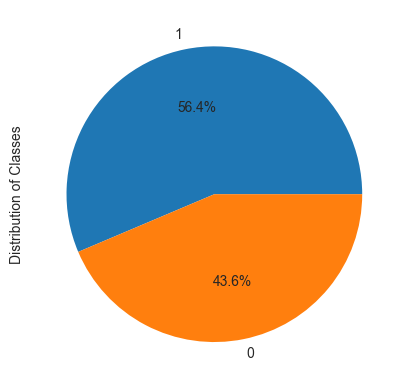

In [294]:
## Plotting the percentage of each class
percentage.plot(kind="pie", autopct="%1.1f%%", ylabel="Distribution of Classes")

### Observation: For Region 1, August has the highest number of fires.
- Classes: 0 = Not Fire, 1 = Fire

Text(0.5, 1.0, 'Fire Analysis for Region 1')

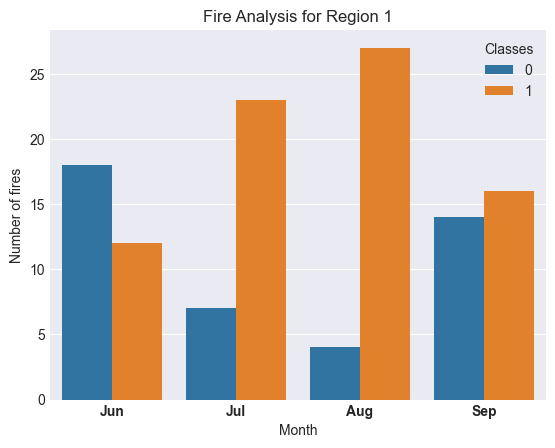

In [295]:
## Monthly Fire Analysis for Region 1
df_region=df.loc[df["Region"]==1]
sns.countplot(x="month", hue="Classes", data=df_region)
plt.xlabel("Month")
plt.ylabel("Number of fires")
plt.xticks(np.arange(4), ["Jun", "Jul", "Aug", "Sep"], weight="bold")
plt.title("Fire Analysis for Region 1")

### Observation: Same observation as Region 1, August has the highest number of fires for Region 0
- Classes: 0 = Not Fire, 1 = Fire

Text(0.5, 1.0, 'Fire Analysis for Region 0')

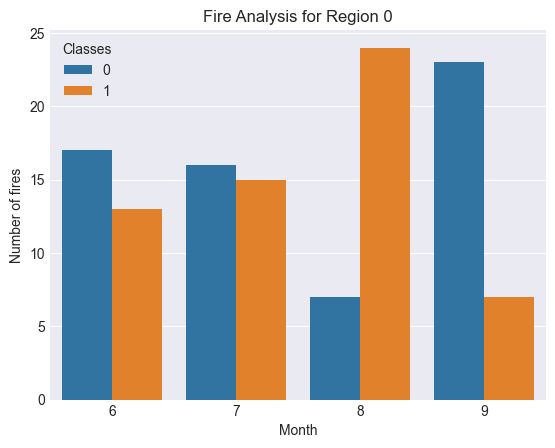

In [296]:
## Monthly Fire Analysis for Region 0
df_region=df.loc[df["Region"]==0]
sns.countplot(x="month", hue="Classes", data=df_region)
plt.xlabel("Month")
plt.ylabel("Number of fires")
plt.title("Fire Analysis for Region 0")

In [297]:
df_cleaned.head().columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [298]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    int64  
 11  Region       243 non-null    int64  
dtypes: float64(7), int64(5)
memory usage: 22.9 KB


## Feature Selection and Model Building

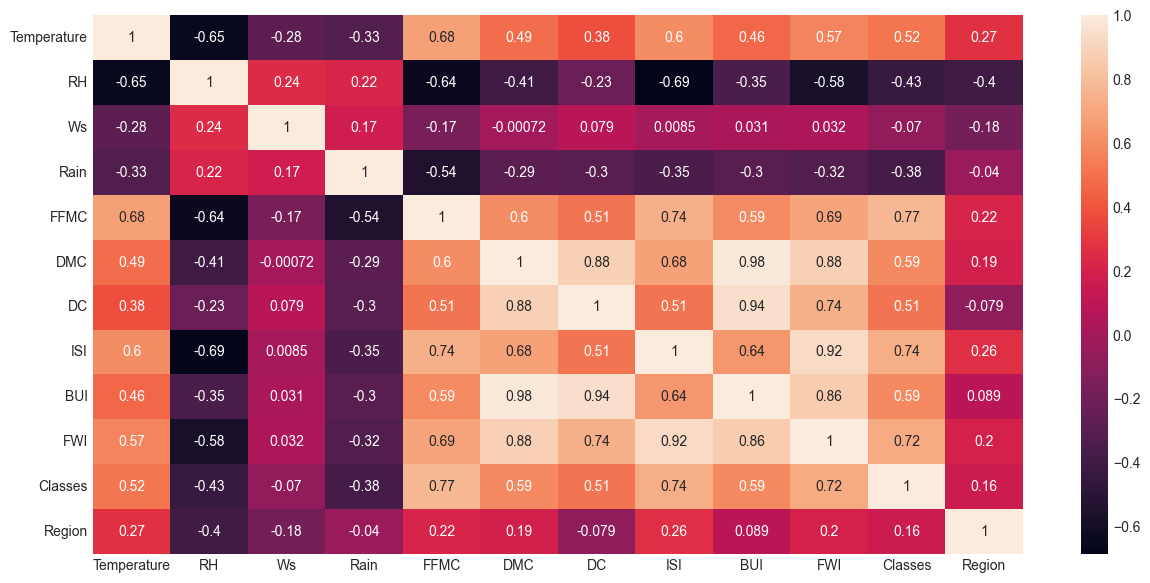

In [299]:
## Checking for correlation between the features using heatmap
plt.figure(figsize=(15,7))
sns.heatmap(df_cleaned.corr(), annot=True)
plt.show()

### Alternatively, using seaborn pairplot to view the relationship between the features. 
- Primarily, we can see the relationship between the features and the target variable for this case, it's the FWI
- We can see that the FWI is highly correlated with the DMC, ISI and BUI

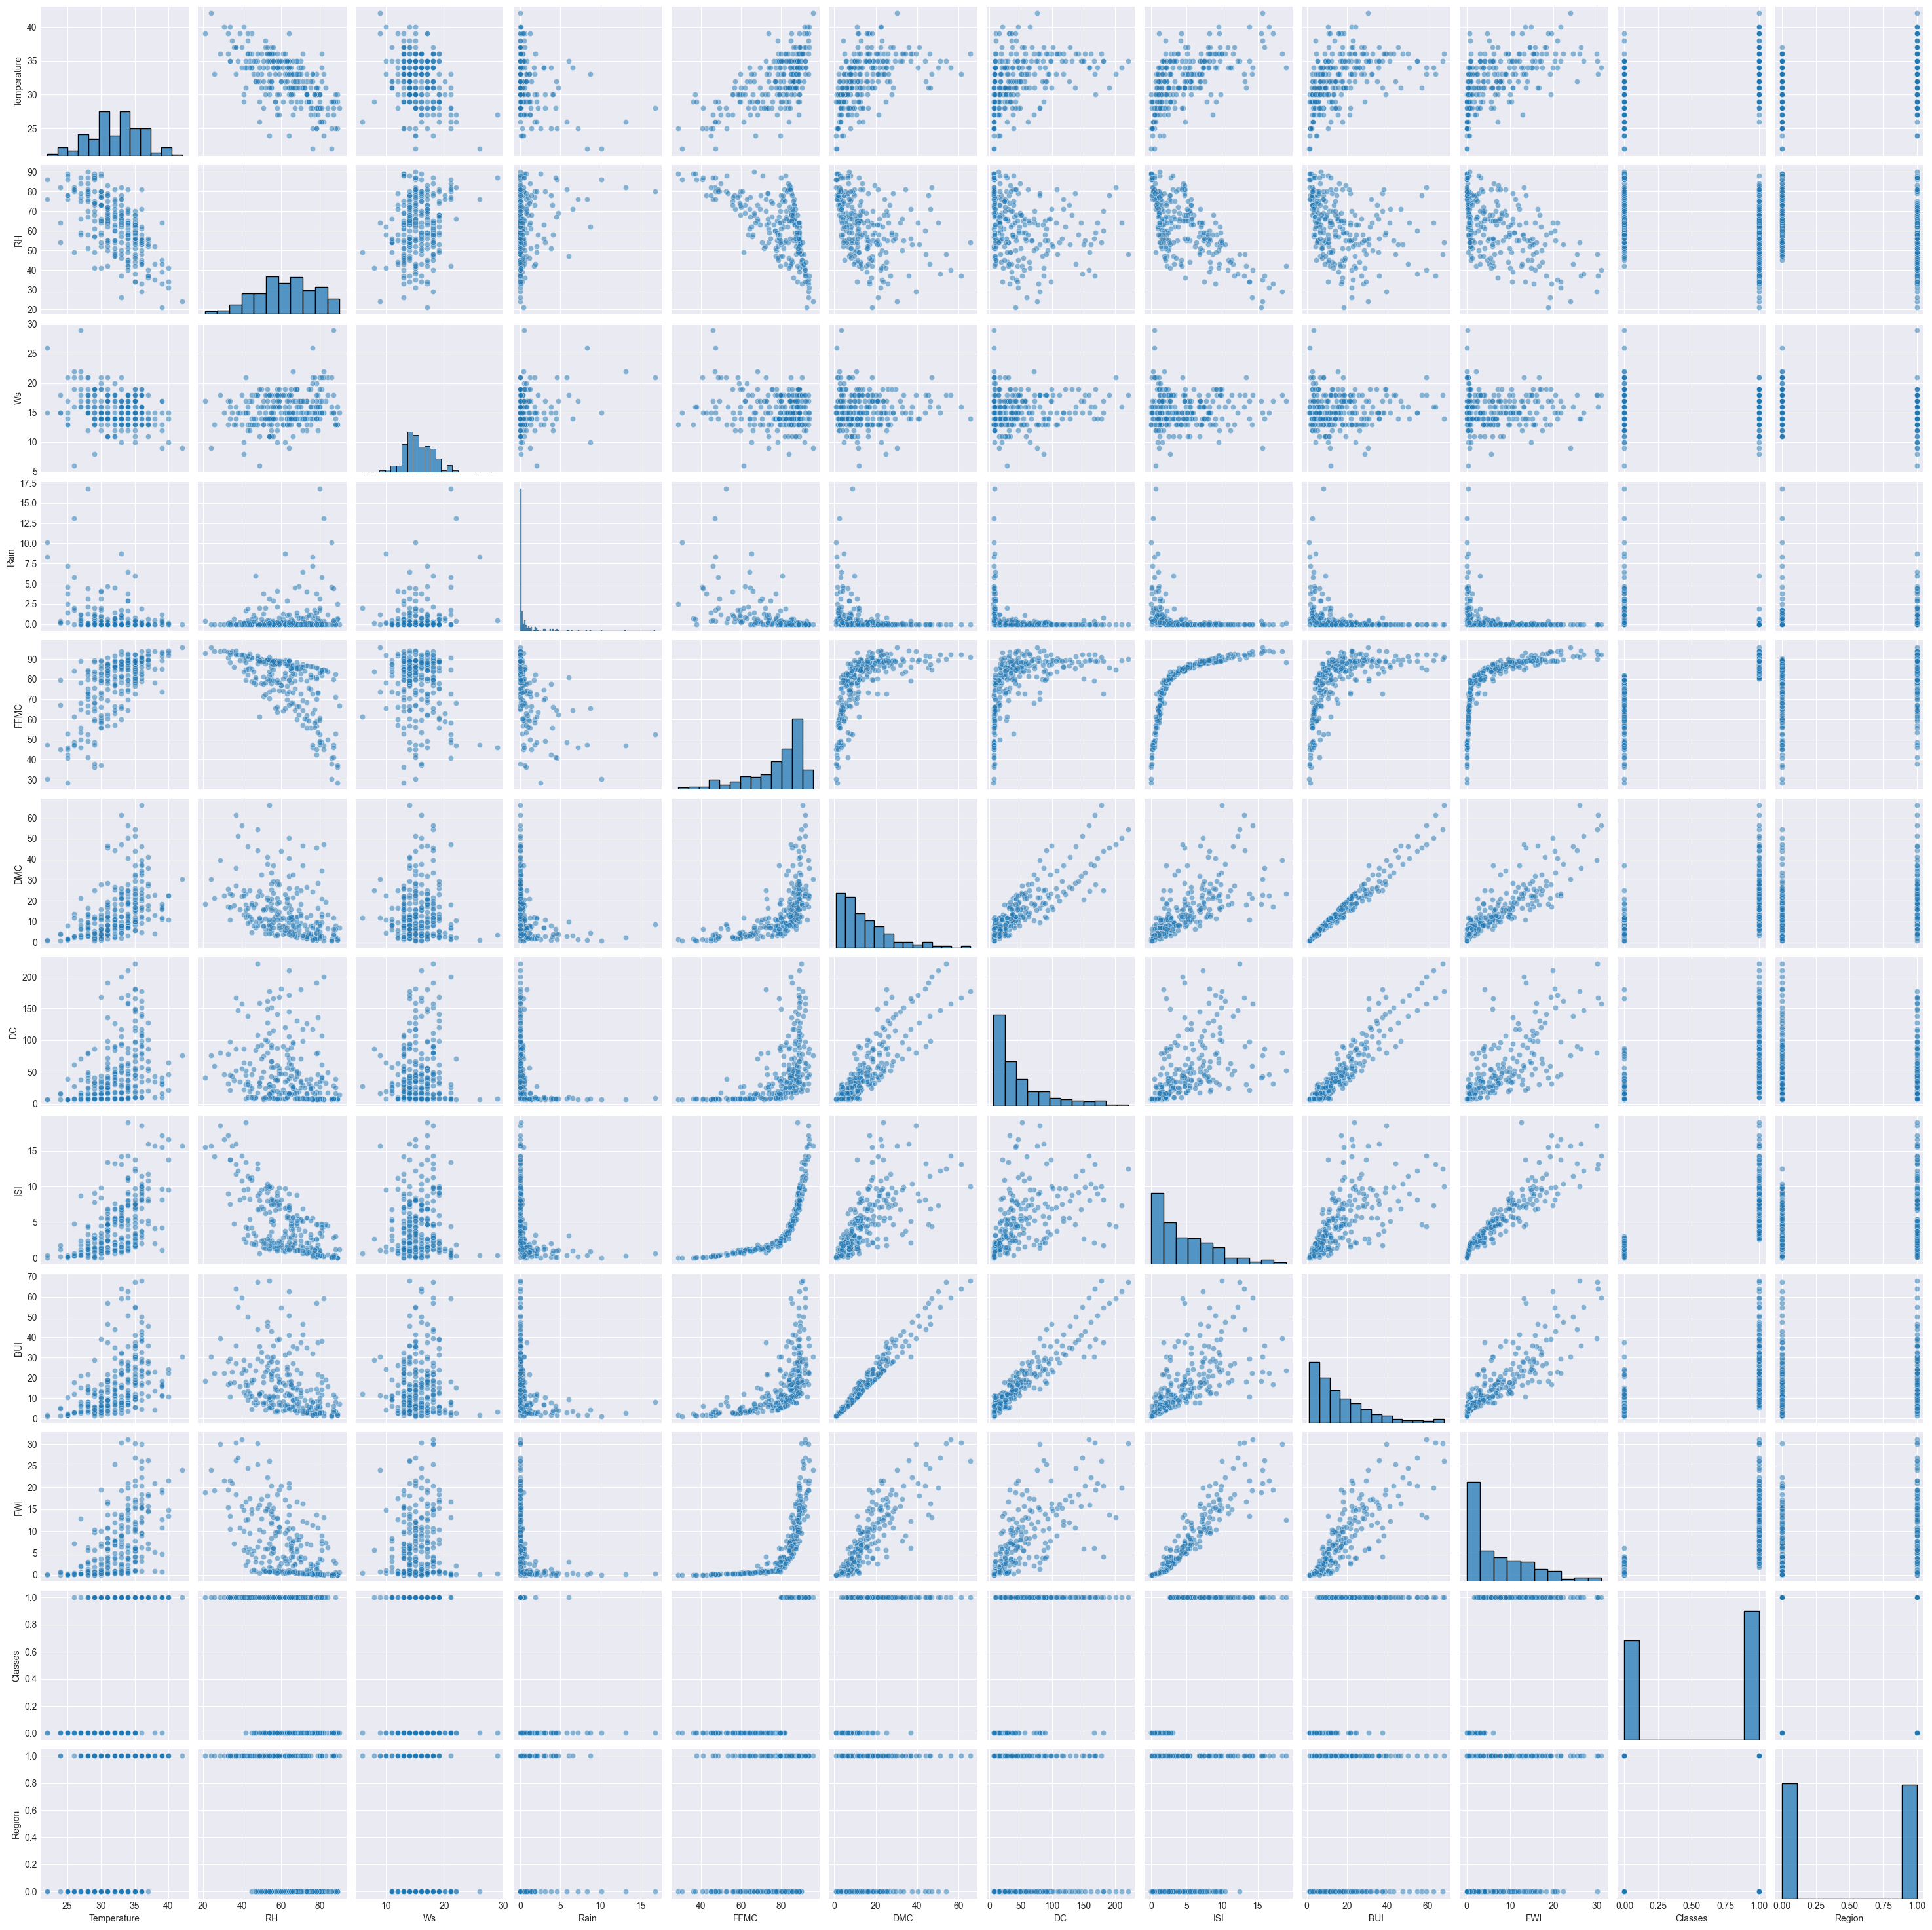

In [300]:
sns.pairplot(df_cleaned, kind="scatter", plot_kws={"alpha": 0.5})

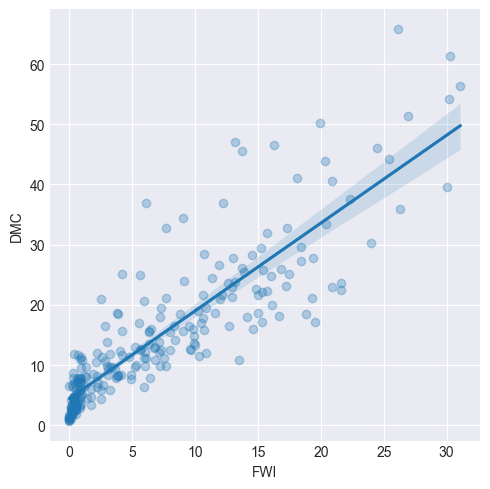

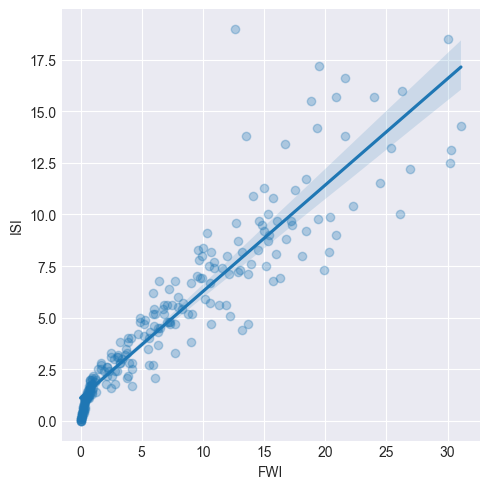

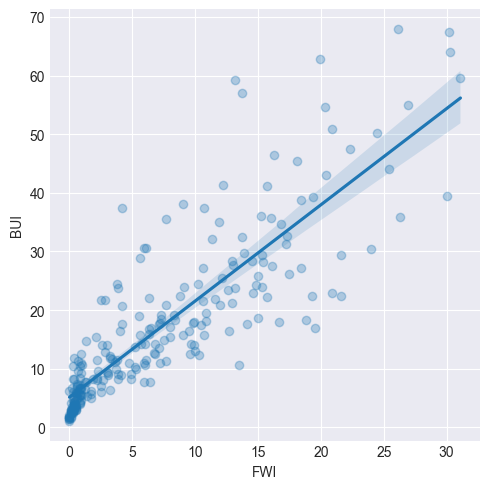

In [301]:
## Using lmplot() to zoom into the relationship between the other features which are highly correlated with the FWI
## linear model plot
sns.lmplot(x="FWI", y="DMC", data=df_cleaned, scatter_kws={"alpha": 0.3})
sns.lmplot(x="FWI", y="ISI", data=df_cleaned, scatter_kws={"alpha": 0.3})
sns.lmplot(x="FWI", y="BUI", data=df_cleaned, scatter_kws={"alpha": 0.3})

In [302]:
## Splitting the data into X and y
X = df_cleaned.drop("FWI", axis=1)

## Target variable
y = df_cleaned["FWI"]

In [303]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [304]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [305]:
# Splitting the data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
## Scaling the data

((194, 11), (49, 11), (194,), (49,))

## Linear Regression

In [306]:
## Linear Regression
from sklearn.linear_model import LinearRegression

# Instantiate the model
lr = LinearRegression()

# Train the model
lr.fit(X_train, y_train)

LinearRegression()

In [307]:
lr.coef_

array([-0.0187748 , -0.01376316, -0.03263954,  0.00436021, -0.06238805,
        0.06945259, -0.00416843,  1.17409784,  0.20492049,  0.59372295,
       -0.35898342])

In [308]:
lr.intercept_

3.8974090659116696

In [309]:
## Check the coefficients for each feature
for i, col in enumerate(X.columns):
    print(f'{col} : {lr.coef_[i]}')

Temperature : -0.018774803157397105
RH : -0.013763157340167947
Ws : -0.032639543608911636
Rain : 0.004360206343143082
FFMC : -0.062388046374630864
DMC : 0.06945258818274996
DC : -0.004168427252325149
ISI : 1.174097840091488
BUI : 0.20492048516440983
Classes : 0.5937229527284047
Region : -0.3589834224994194


In [310]:
## Applying the model on test data

y_pred = lr.predict(X_test)
y_pred

array([ 8.29231794e+00,  7.50971632e+00, -6.55981961e-02,  5.11613460e+00,
        6.56174938e+00,  1.40652323e+00,  2.23203159e+00,  7.51593399e+00,
        1.90107234e+00,  3.18084071e+00,  1.34937743e-02,  7.32818707e+00,
        9.52214619e+00,  1.64466583e+01,  1.90635989e+01,  1.29952787e+00,
        2.21674743e+00, -8.23720537e-03,  6.76589850e+00,  3.17057747e+00,
        1.23263647e+00,  2.06775547e-01,  6.46554179e+00,  8.77700023e-02,
        2.11408365e+01,  4.94973652e+00,  5.86171114e+00,  9.94168492e+00,
        1.97191735e-01,  9.69120094e+00,  6.28797676e+00, -1.04645824e-01,
        1.02551778e+01,  1.49928490e+01,  1.31897991e+00,  6.34353032e-01,
        1.81990405e+00,  6.13521379e+00, -3.15133797e-01, -5.97344452e-01,
        7.04477796e+00,  1.65184666e+00,  8.49465143e+00, -3.65689845e-01,
        1.52966076e+01,  7.87798177e+00,  7.67386131e+00,  1.05918207e+00,
        1.25366531e+01])

In [311]:
## Evaluate the model using the metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(f'R2 Score: {r2_score(y_test, y_pred)}')
print(f'MAE : {mean_absolute_error(y_test, y_pred)}')
print(f'MSE : {mean_squared_error(y_test, y_pred)}')
print(f'RMSE : {np.sqrt(mean_squared_error(y_test, y_pred))}')

R2 Score: 0.9890356825759857
MAE : 0.4267520614689858
MSE : 0.3323111538486372
RMSE : 0.5764643560955327


## Recursive Feature Elimination (RFE)

In [312]:
## Techniques to find out the important features of the model
from sklearn.feature_selection import RFE

rfe = RFE(lr, n_features_to_select=5)

rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [313]:
## Get the features selected by RFE
rfe.get_feature_names_out()

array(['DMC', 'ISI', 'BUI', 'Classes', 'Region'], dtype=object)

In [314]:
## Listing the rankings of features
rfe.ranking_

array([4, 5, 3, 6, 2, 1, 7, 1, 1, 1, 1])

## Variance Inflation Factor (VIF)
- Using VIF to measures the amount of multicollinearity in a set of multiple regression variables
- Using seaborn barplot for visualization

In [315]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [316]:
X.shape

(243, 11)

In [317]:
X.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'Classes', 'Region'],
      dtype='object')

In [318]:
## Create a VIF DF to store the features(columns) and the VIF score
vif = pd.DataFrame()
vif["feature"] = X.columns
vif["vif"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif

,feature,vif
0,Temperature,109.429048
1,RH,32.236045
2,Ws,37.130416
3,Rain,1.655248
4,FFMC,114.994902
5,DMC,205.539005
6,DC,51.257576
7,ISI,11.137955
8,BUI,393.610061
9,Classes,7.064774


Text(0.5, 1.0, 'VIF Scores of Features')

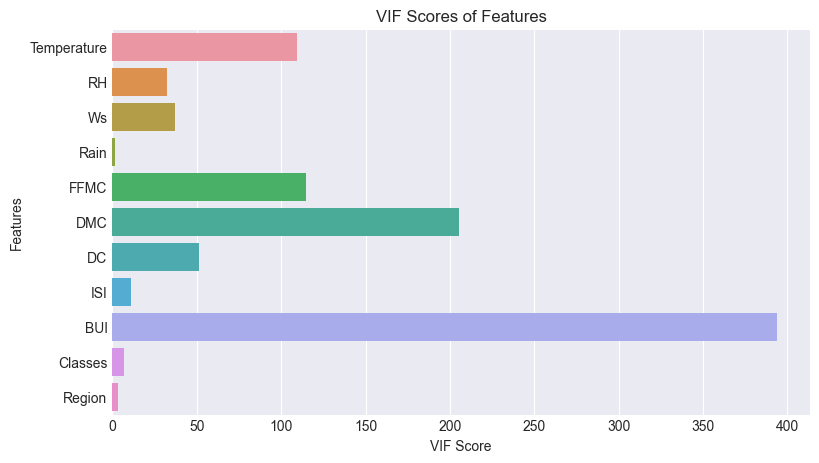

In [319]:
plt.figure(figsize=(9,5))
vif_view = sns.barplot( data=vif, x="vif", y="feature")
vif_view.set(xlabel="VIF Score", ylabel="Features")
vif_view.set_title("VIF Scores of Features")

In [320]:
## Drop the feature with the highest VIF
X.drop("BUI", axis=1, inplace=True)

In [321]:
## Create a VIF DF to store the features(columns) and the VIF score

## 2nd round, run it again to see the new VIF score
vif = pd.DataFrame()
vif["feature"] = X.columns
vif["vif"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif

,feature,vif
0,Temperature,109.166458
1,RH,32.212117
2,Ws,37.119996
3,Rain,1.651458
4,FFMC,114.820856
5,DMC,19.565136
6,DC,13.551424
7,ISI,11.131733
8,Classes,6.944951
9,Region,3.038594


In [322]:
## Drop the feature with the highest VIF

X.drop(columns=["FFMC", "Temperature"], axis=1, inplace=True)

In [323]:
## Create a VIF DF to store the features(columns) and the VIF score

## 3rd round, run it again to see the new VIF score
vif = pd.DataFrame()
vif["feature"] = X.columns
vif["vif"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif

,feature,vif
0,RH,23.618838
1,Ws,32.591026
2,Rain,1.441336
3,DMC,19.521511
4,DC,13.535772
5,ISI,9.796390
6,Classes,5.662379
7,Region,2.713006


In [324]:
## Drop the feature with the highest VIF

X.drop(columns=["Ws"], axis=1, inplace=True)

In [325]:
## Create a VIF DF to store the features(columns) and the VIF score

## 4th round, run it again to see the new VIF score
vif = pd.DataFrame()
vif["feature"] = X.columns
vif["vif"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif

,feature,vif
0,RH,3.032168
1,Rain,1.368589
2,DMC,19.110532
3,DC,13.213015
4,ISI,6.946249
5,Classes,5.504120
6,Region,2.659704


In [326]:
## Drop the feature with the highest VIF

X.drop(columns=["DMC"], axis=1, inplace=True)

### After several rounds, below are the remaining features/columns after VIF processs
- Visuals are added

In [327]:
## Create a VIF DF to store the features(columns) and the VIF score

## 5th round, run it again to see the new VIF score
vif = pd.DataFrame()
vif["feature"] = X.columns
vif["vif"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif

,feature,vif
0,RH,2.990961
1,Rain,1.360137
2,DC,3.235460
3,ISI,5.794194
4,Classes,5.492709
5,Region,2.131770


Text(0.5, 1.0, 'VIF Scores of Features')

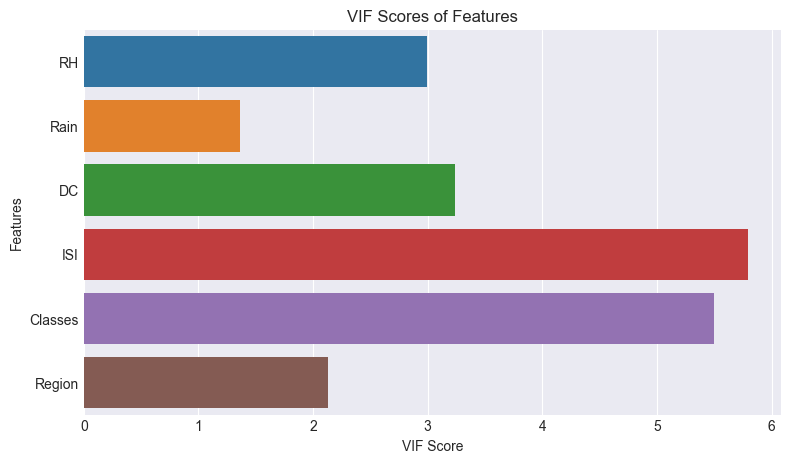

In [328]:
plt.figure(figsize=(9,5))
vif_view = sns.barplot(data=vif, x="vif", y="feature")
vif_view.set(xlabel="VIF Score", ylabel="Features")
vif_view.set_title("VIF Scores of Features")

In [329]:
## Remaining features/columns after VIF processs
X.columns

Index(['RH', 'Rain', 'DC', 'ISI', 'Classes', 'Region'], dtype='object')

In [330]:
X.shape

(243, 6)

## Polynomial Regression

In [331]:
## Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

In [332]:
X_poly.shape

(243, 27)

In [333]:
X_tr_poly, X_te_poly, y_tr, y_te = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [334]:
X_tr_poly

array([[ 65. ,   0.6,  15.2, ...,   0. ,   0. ,   0. ],
       [ 37. ,   0. , 167.2, ...,   1. ,   1. ,   1. ],
       [ 43. ,   0.5,  35.4, ...,   1. ,   1. ,   1. ],
       ...,
       [ 76. ,   7.2,   7.5, ...,   0. ,   0. ,   0. ],
       [ 59. ,   0. ,  47.2, ...,   1. ,   1. ,   1. ],
       [ 77. ,   1.8,   8.4, ...,   0. ,   0. ,   0. ]])

In [335]:
lr.fit(X_tr_poly, y_tr)

LinearRegression()

In [336]:
y_pred_poly = lr.predict(X_te_poly)

### Linear Regression result
R2 Score: 0.9890356825759857
MAE : 0.4267520614689858
MSE : 0.3323111538486372
RMSE : 0.5764643560955327

### Polynomial Regression result, below 

In [337]:
print(f"R2 Score: {r2_score(y_test, y_pred_poly)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_poly)}")
print(f"Mean Squared Error {mean_squared_error(y_test, y_pred_poly)}")
print(f"RMSE {np.sqrt(mean_squared_error(y_test, y_pred_poly))}")

R2 Score: 0.9776567109103836
Mean Absolute Error: 0.5879688388050197
Mean Squared Error 0.6771898232243689
RMSE 0.8229154411143158


## Lasso, Ridge and ElasticNet
- Lasso (Least Absolute Shrinkage and Selection Operator), Ridge Regression, and Elastic Net are regularization techniques used in linear regression to prevent overfitting and improve the model's generalization performance

In [338]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

## RIDGE 
rd = Ridge(alpha=0.001)
rd.fit(X_train, y_train)
y_pred_rd = rd.predict(X_test)

print(f"R2 Score: {r2_score(y_test, y_pred_rd)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rd)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_rd)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rd))}")

R2 Score: 0.9890356092372372
MAE: 0.42675095515162975
MSE: 0.3323133766303395
RMSE: 0.5764662840360566


In [339]:
## Checking the coefficient for each features after using Ridge
for i, col in enumerate(X.columns):
    print(f"{col} : {rd.coef_[i]}")

RH : -0.01877474418640255
Rain : -0.01376278976281534
DC : -0.03263948798952431
ISI : 0.004361014874784623
Classes : -0.06238706190296775
Region : 0.06945229946556784


In [340]:
## LASSO
ls = Lasso(alpha=0.09)
ls.fit(X_train, y_train)
y_pred_ls = ls.predict(X_test)

print(f"R2 Score: {r2_score(y_test, y_pred_ls)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_ls)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_ls)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ls))}")

R2 Score: 0.9862943923917633
MAE: 0.445421245268327
MSE: 0.41539533218131686
RMSE: 0.6445117005775123


In [341]:
## Checking the coefficient for each features after using LASSO
for i, col in enumerate(X.columns):
    print(f"{col} : {ls.coef_[i]}")

RH : -0.0
Rain : -0.005522948192629453
DC : -0.008101772419029048
ISI : 0.0
Classes : -0.048750313467997554
Region : 0.07947360626184972


In [342]:
## ElasticNet
en = ElasticNet(alpha=0.09, l1_ratio=1)
en.fit(X_train, y_train)
y_pred_en = en.predict(X_test)

print(f"R2 Score: {r2_score(y_test, y_pred_en)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_en)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_en)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_en))}")

R2 Score: 0.9862943923917633
MAE: 0.445421245268327
MSE: 0.41539533218131686
RMSE: 0.6445117005775123


In [343]:
## Checking the coefficient for each features after using ElasticNet
for i, col in enumerate(X.columns):
    print(f"{col} : {en.coef_[i]}")

RH : -0.0
Rain : -0.005522948192629453
DC : -0.008101772419029048
ISI : 0.0
Classes : -0.048750313467997554
Region : 0.07947360626184972


### Cross validation

In [344]:
## Apply Cross validation
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(lr, X, y, cv=5)
cvs.mean()

0.9194415425309994

## Using Decision Tree
### Need to change the target variable to binary, since FWI is continous variable
### We have to retrain for the new model and using "Classes" as the target variable

In [345]:
from sklearn.tree import DecisionTreeClassifier

## Creating new X and y variables
X2 = df_cleaned.drop("Classes", axis=1)
y2 = df_cleaned["Classes"] 

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=42)

## Instantiate Decision Tree, with max_depth = 5
dt = DecisionTreeClassifier(max_depth=5)

## Train the model
dt.fit(X2_train, y2_train)

DecisionTreeClassifier(max_depth=5)

In [346]:
X2_train

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
97,29,74,19,0.1,75.8,3.6,32.2,2.1,5.6,0.9,0
141,31,72,14,0.2,60.2,3.8,8.0,0.8,3.7,0.3,1
192,40,31,15,0.0,94.2,22.5,46.3,16.6,22.4,21.6,1
68,32,60,18,0.3,77.1,11.3,47.0,2.2,14.1,2.6,0
119,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,0
...,...,...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,7.3,0.2,1.4,0.0,0
14,28,80,17,3.1,49.4,3.0,7.4,0.4,3.0,0.1,0
92,25,76,17,7.2,46.0,1.3,7.5,0.2,1.8,0.1,0
179,34,59,16,0.0,88.1,19.5,47.2,7.4,19.5,10.9,1


In [347]:
y2_train.value_counts()

Classes
1    100
0     82
Name: count, dtype: int64

In [348]:
y2

0      0
1      0
2      0
3      0
4      0
      ..
238    1
239    0
240    0
241    0
242    0
Name: Classes, Length: 243, dtype: int64

## Visualize the Decision Tree using plot_tree()

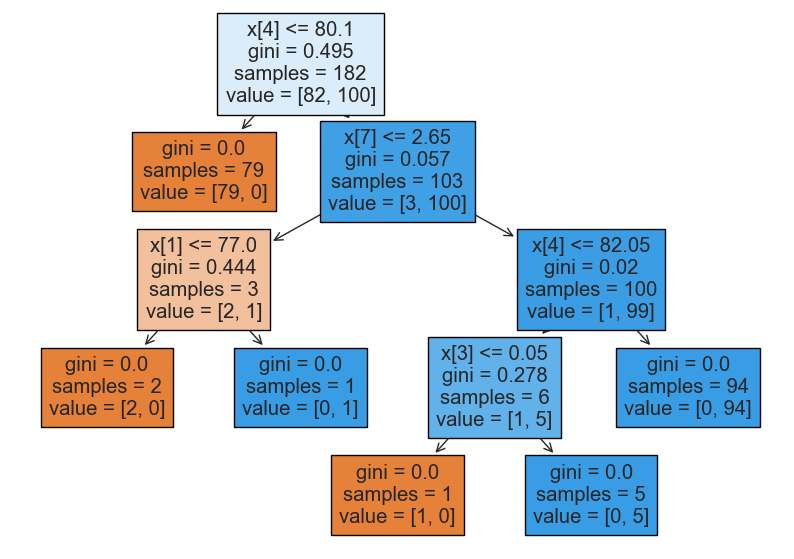

In [349]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 7))
plot_tree(dt, filled=True)
plt.show()

In [350]:
y_pred_dt = dt.predict(X2_test)

## Check the accuracy score of the model and confusion matrix

In [351]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y2_test, y_pred_dt)

0.9836065573770492

In [352]:
confusion_matrix(y2_test, y_pred_dt)

array([[24,  0],
       [ 1, 36]], dtype=int64)

## Post-pruning the Decision Tree and we'll see the new accuracy score and confusion matrix
### - updating the max_depth to 2
### - updating the criterion to entropy

In [353]:
dt_pp = DecisionTreeClassifier(max_depth=2, criterion='entropy')
dt_pp.fit(X2_train, y2_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

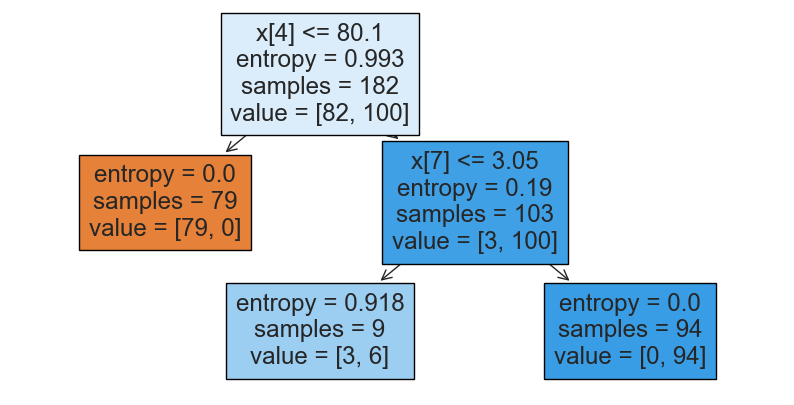

In [354]:
plt.figure(figsize=(10, 5))
plot_tree(dt_pp, filled=True)
plt.show()

In [355]:
y_pred_dt_pp = dt_pp.predict(X2_test)

In [356]:
accuracy_score(y2_test,y_pred_dt_pp)

0.9836065573770492

In [357]:
confusion_matrix(y2_test, y_pred_dt_pp)

array([[23,  1],
       [ 0, 37]], dtype=int64)

# Model Deployment
- Conclusion: Ridge Regression is the best model to predict the FWI, though the R2 score, MAE, MSE, and RMSE are almost identical with the Linear Regression model.

In [ ]:
import pickle
pickle.dump(rd, open("rd_model.pkl", "wb"))